In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import seaborn as sns

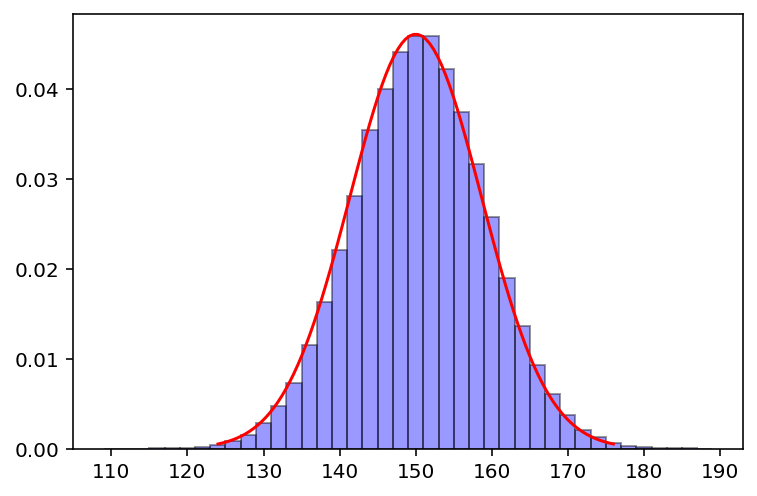

In [8]:
iterations = 200000
samples = 300
result = np.empty(iterations)
result_standardized = np.empty(iterations)
result = np.random.binomial(samples, 0.5, iterations)

mu = samples/2
variance = samples/4
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color='red');

sns.distplot(result, hist=True, kde=False, 
             bins=40, color = 'blue',
             hist_kws={'edgecolor':'black'},norm_hist=True);

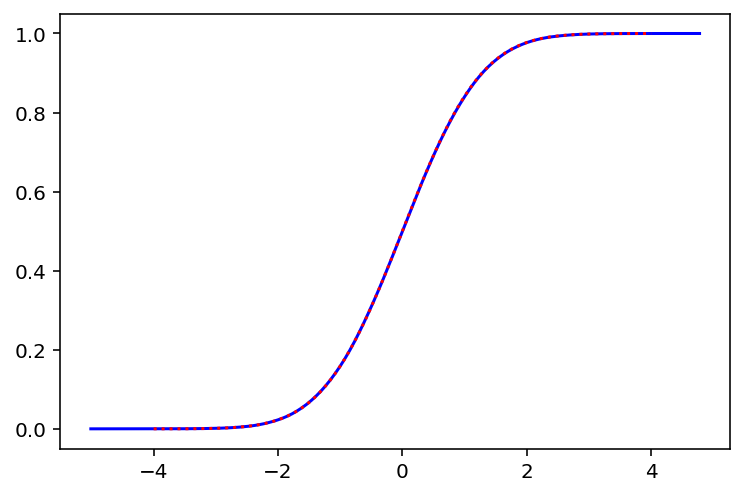

In [9]:
result_standardized = ((result-samples/2)/(math.sqrt(samples/4)))
sns.distplot(result_standardized,
             hist_kws=None,
             kde_kws=dict(cumulative=True),
             hist=False,
            color='blue');
y=np.linspace(-4,4,100)           
plt.plot(y,stats.norm.cdf(y,0,1),':',color='red');

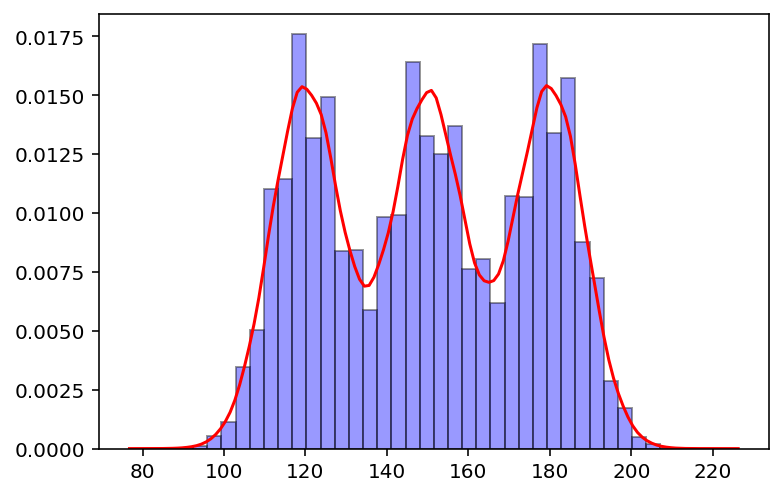

In [3]:
#Distribution of picking one of the three coins at random and tossing it 300 times.
samples = 1000000
a = np.random.uniform(0,1,samples)
result = np.empty(len(a))
for i in range(a.size):
    if a[i]<1/3:
        result[i] = (np.random.binomial(300,0.4))
    elif a[i]<2/3:
        result[i] = (np.random.binomial(300,0.5))
    else:
        result[i] = (np.random.binomial(300,0.6))

sns.distplot(result, hist=True, kde=True, 
             bins=40, color = 'blue',
             hist_kws={'edgecolor':'black'},norm_hist=True,
             kde_kws=dict(color='red'));

KstestResult(statistic=0.009223288245315209, pvalue=0.3626480209419946)


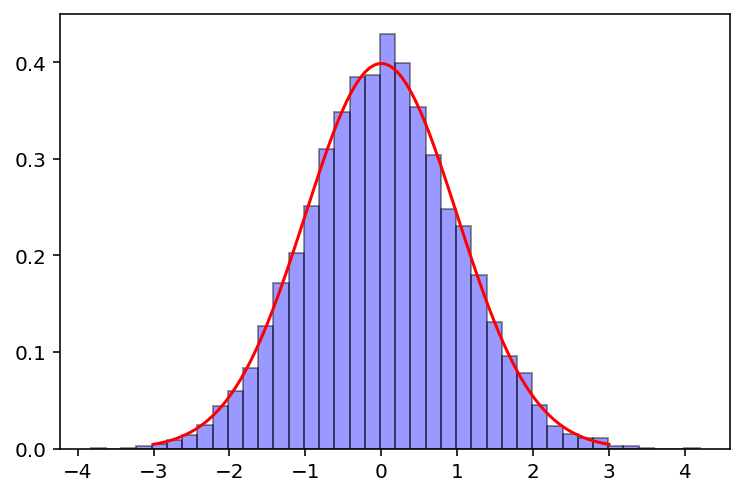

In [21]:
#Calculation of the K-S test for the (standardized) sample mean of a uniform distribution with n=300.
iterations = 10000
result = np.empty(iterations)
samples = 300
for i in range(iterations):
    a = np.random.uniform(0,1,samples)
    result[i] = ((math.sqrt(samples) * (np.mean(a) - 0.5))/(math.sqrt((1/12))))
    
x = np.linspace(-3, 3, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1),color='red');

sns.distplot(result, hist=True, kde=False, 
             bins=40, color = 'blue',
             hist_kws={'edgecolor':'black'},norm_hist=True);

print(stats.kstest(result,'norm'))

KstestResult(statistic=0.03895284621420769, pvalue=1.3234855514865805e-13)


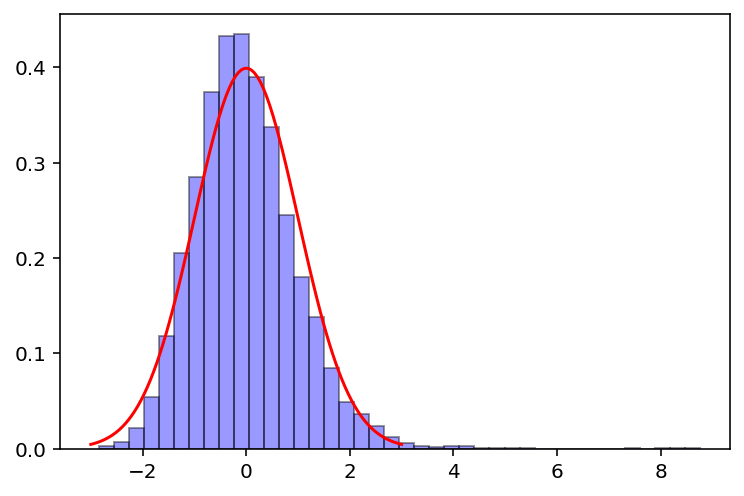

In [22]:
#Calculation of the K-S test for the sample mean of a pareto type II distribution (sometimes referred to
#as Lomax) with parameters alpha=3 and lambda=1, n=300.
iterations = 10000
result = np.empty(iterations)
samples = 300
for i in range(iterations):
    a = np.random.pareto(3,samples)
    result[i] = ((math.sqrt(samples) * (np.mean(a)-(1/2)))/(math.sqrt(0.75)))
    
x = np.linspace(-3, 3, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1),color='red');

sns.distplot(result, hist=True, kde=False, 
             bins=40, color = 'blue',
             hist_kws={'edgecolor':'black'},norm_hist=True);

print(stats.kstest(result,'norm'))

KstestResult(statistic=0.012362979296842935, pvalue=0.09406003585729698)


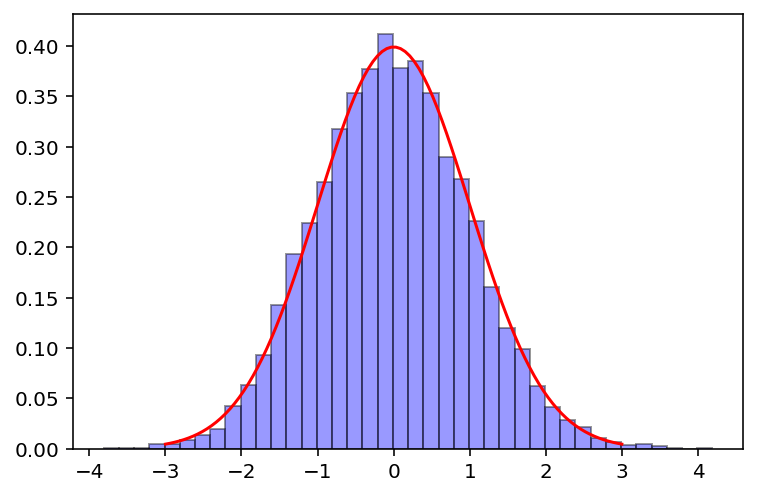

In [24]:
#Calculation of the K-S test as before but with n=30000.
iterations = 10000
result = np.empty(iterations)
samples = 30000
for i in range(iterations):
    a = np.random.pareto(3,samples)
    result[i] = ((math.sqrt(samples) * (np.mean(a)-(1/2)))/(math.sqrt(0.75)))

x = np.linspace(-3, 3, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1),color='red');

sns.distplot(result, hist=True, kde=False, 
             bins=40, color = 'blue',
             hist_kws={'edgecolor':'black'},norm_hist=True);

print(stats.kstest(result,'norm'))

Pareto 3 max: 357.6192285807917
Pareto 3 probability of > 100: 9.705901479195589e-07
Pareto 2 max: 2000.4826346631796
Pareto 2 probability of > 100: 9.80296049406526e-05
Pareto 1 max: 45451896.039782874
Pareto 1 probability of > 100: 0.00990099009900991


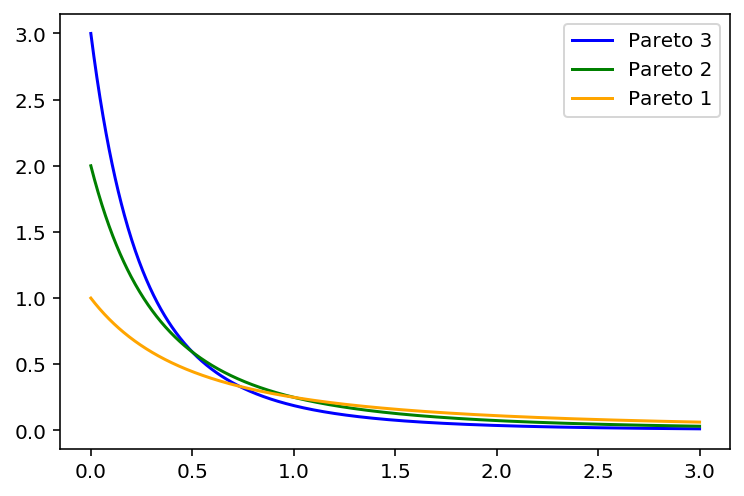

In [27]:
#Pareto distribution (type II) pdf plots with parameters lambda=1, alpha=3,2,1.
x=np.linspace(0,3,1000)
plt.plot(x,stats.lomax.pdf(x,3),color='blue', label='Pareto 3')
plt.plot(x,stats.lomax.pdf(x,2),color='green', label='Pareto 2')
plt.plot(x,stats.lomax.pdf(x,1),color='orange', label='Pareto 1')
plt.legend(loc='upper right')

samples = 1000000
for i in [3,2,1]:
    result = np.random.pareto(i,samples)
    print("Pareto", i, "max:", np.max(result))
    print("Pareto", i, "probability of > 100:", 1 - stats.lomax.cdf(100,i))